# Analysis of exports and imports of sheep and goats in Ireland.

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import scipy.stats as stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy as sp
import researchpy as rp

# EU trade since 2002 by CPA 2.1

# IMPORT 

In [2]:
# IMPORTING THE EU trade since 2002 by CPA 2.1
df1 = pd.read_csv('IMPORT.gz')
df1.head()

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2017,47476,NaN
1,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2018,157223,NaN
2,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2019,1460957,NaN
3,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2020,147652,NaN
4,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BG,IE,145,1,VALUE_IN_EUROS,2020,114552,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     24 non-null     object 
 1   LAST UPDATE  24 non-null     object 
 2   freq         24 non-null     object 
 3   reporter     24 non-null     object 
 4   partner      24 non-null     object 
 5   product      24 non-null     int64  
 6   flow         24 non-null     int64  
 7   indicators   24 non-null     object 
 8   TIME_PERIOD  24 non-null     int64  
 9   OBS_VALUE    24 non-null     int64  
 10  OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.2+ KB


In [4]:
df_imp= df1.drop(columns=['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG'])
df_imp.head()

,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
0,BE,IE,145,1,VALUE_IN_EUROS,2017,47476
1,BE,IE,145,1,VALUE_IN_EUROS,2018,157223
2,BE,IE,145,1,VALUE_IN_EUROS,2019,1460957
3,BE,IE,145,1,VALUE_IN_EUROS,2020,147652
4,BG,IE,145,1,VALUE_IN_EUROS,2020,114552


In [5]:
df_imp['reporter'].describe()

count     24
unique     9
top       FR
freq       5
Name: reporter, dtype: object

In [6]:
rp.summary_cat(df_imp['reporter'])

,Variable,Outcome,Count,Percent
0,reporter,FR,5,20.83
1,,NL,5,20.83
2,,BE,4,16.67
3,,IT,4,16.67
4,,DE,2,8.33
5,,BG,1,4.17
6,,ES,1,4.17
7,,HU,1,4.17
8,,RO,1,4.17


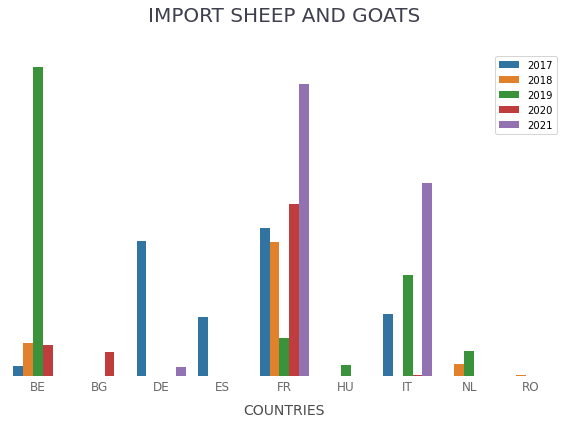

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', hue='TIME_PERIOD', data = df_imp, ax=ax) 

ax.set_frame_on(False)
ax.set_title('IMPORT SHEEP AND GOATS', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
ax.legend(loc="upper right");

plt.tight_layout();

In [8]:
# Finding some statistics by a grouping categorical variable:
df_imp = df_imp.groupby('TIME_PERIOD', axis = 0).median()
df_imp

,product,flow,OBS_VALUE
TIME_PERIOD,,,
2017,145.0,1.0,286478.0
2018,145.0,1.0,108618.0
2019,145.0,1.0,178928.0
2020,145.0,1.0,114552.0
2021,145.0,1.0,476879.5


# EXPORT

In [9]:
# IMPORTING THE EU trade since 2002 by CPA 2.1
df2 = pd.read_csv('EXPORT.gz')
df2.head(2)

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,DE,IE,145,2,VALUE_IN_EUROS,2021,21613,NaN
1,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,DK,IE,145,2,VALUE_IN_EUROS,2021,28990,NaN


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     15 non-null     object 
 1   LAST UPDATE  15 non-null     object 
 2   freq         15 non-null     object 
 3   reporter     15 non-null     object 
 4   partner      15 non-null     object 
 5   product      15 non-null     int64  
 6   flow         15 non-null     int64  
 7   indicators   15 non-null     object 
 8   TIME_PERIOD  15 non-null     int64  
 9   OBS_VALUE    15 non-null     int64  
 10  OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.4+ KB


In [11]:
print(df2['reporter'].unique())

['DE' 'DK' 'FR' 'IT' 'NL' 'RO' 'SE']


In [12]:
df_exp= df2.drop(columns=['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG'])
df_exp.head()

,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
0,DE,IE,145,2,VALUE_IN_EUROS,2021,21613
1,DK,IE,145,2,VALUE_IN_EUROS,2021,28990
2,FR,IE,145,2,VALUE_IN_EUROS,2017,30129
3,FR,IE,145,2,VALUE_IN_EUROS,2019,10647
4,FR,IE,145,2,VALUE_IN_EUROS,2020,25821


In [13]:
df_exp['reporter'].describe()

count     15
unique     7
top       NL
freq       5
Name: reporter, dtype: object

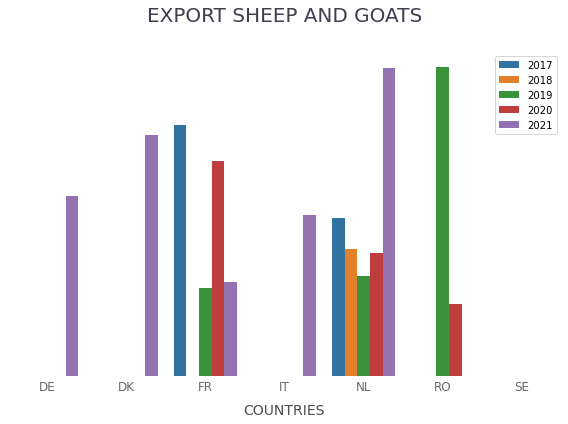

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', hue='TIME_PERIOD', data = df_exp, ax=ax) 

ax.set_frame_on(False)
ax.set_title('EXPORT SHEEP AND GOATS', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
ax.legend(loc="upper right");

plt.tight_layout();

In [15]:
# Finding some statistics by a grouping categorical variable:
df_exp = df_exp.groupby('TIME_PERIOD', axis = 0).median()
df_exp

,product,flow,OBS_VALUE
TIME_PERIOD,,,
2017,145.0,2.0,24570.5
2018,145.0,2.0,7660.0
2019,145.0,2.0,11988.0
2020,145.0,2.0,14808.0
2021,145.0,2.0,21613.0


# Import Ireland

In [16]:
def get_trade(state, flow):
    filename = f'trade_{flow}_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/taxud/weeklyData/{flow}?memberStateCodes={state}&sectors=Sheep')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [17]:
trade_import= get_trade('IE','import')
trade_import.head(2)

The file trade_import_IE.zip was read.


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,100,233,6.94,34,34,1.0
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,286512,6.83,41966,41966,1.0


In [18]:
trade_import.shape

(967, 17)

In [19]:
print(trade_import['marketingYear'].unique())

[2022 2021 2020 2019 2018 2017 2016 2014 2013 2012 2011]


In [20]:
trade_import = get_trade('IE','import')
print(trade_import['product'].unique())
trade_import.head(2)

The file trade_import_IE.zip was read.
['Preparations' 'Fresh meat' 'Frozen Meat' 'Offals'
 'Salted, dried, smoked meat']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,100,233,6.94,34,34,1.0
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,286512,6.83,41966,41966,1.0


In [21]:
df21 = trade_import[trade_import['marketingYear'] == 2021]
df21.head(5)

,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
414,Sheep,2021,53,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,163453,7.60,21507,21507,1.0
415,Sheep,2021,53,IE,Ireland,EU,European Union,Preparations,16029091,1602909100,4000,100,689,6.96,99,99,1.0
416,Sheep,2021,53,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,300,2488,14.57,171,171,1.0
417,Sheep,2021,53,IE,Ireland,GB,United Kingdom,Frozen Meat,2044290,204429010,4000,300,42319,6.96,6083,6083,1.0
418,Sheep,2021,53,IE,Ireland,NZ,New Zealand,Frozen Meat,2044230,204423010,4000,100,165,8.57,19,19,1.0


# EXPORT IRELAND   

In [22]:
trade_export = get_trade('IE', 'export')
trade_export.sample(3)

The file trade_export_IE.zip was read.


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
3859,Sheep,2018,53,IE,Ireland,CH,Switzerland,Fresh meat,2041000,204100000,10,0,16113,5.32,3027,3027,1.00
3308,Sheep,2020,2,IE,Ireland,CH,Switzerland,Fresh meat,2041000,204100000,10,0,6532,6.22,1051,1051,1.00
1710,Sheep,2021,39,IE,Ireland,CH,Switzerland,Fresh meat,2042300,204230000,10,0,153352,24.32,6306,11414,1.81


In [23]:
print(trade_export['partner'].unique())
trade_export.head(10)

['United Kingdom' 'Ivory Coast' 'Canada' 'Singapore' 'Philippines'
 'Switzerland' 'United Arab Emirates' 'Japan' 'Ghana'
 'Trinidad and Tobago' 'Hong Kong' 'United States of America'
 'New Zealand' 'China' 'Qatar' 'Libya'
 'Countries and territories not specified' 'Kuwait' 'South Africa'
 'European Union' 'Cape Verde' 'Australia' 'Vietnam' 'Congo' 'Uganda'
 'Central African Republic' 'Tanzania' 'Ukraine' 'Comoros' 'Gabon'
 'Albania' 'Turkey' 'Liberia' 'Taiwan' 'Norway' 'India' 'Maldives'
 'Lebanon' 'Tunisia' 'Bahrain']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042300,204230000,10,0,15051,11.87,1268,2295,1.81
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042230,204223000,10,0,9091,3.59,2532,2532,1.00
2,Sheep,2022,52,IE,Ireland,CI,Ivory Coast,Fresh meat,2041000,204100000,10,0,21500,0.86,25000,25000,1.00
3,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042250,204225000,10,0,815,9.59,85,85,1.00
4,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044290,204429000,10,0,15003,5.33,2817,2817,1.00
5,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,10,0,365751,7.56,48390,48390,1.00
6,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100000,10,0,24713,6.37,3881,3881,1.00
7,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042210,204221000,10,0,40128,7.08,5667,5667,1.00
8,Sheep,2022,52,IE,Ireland,CA,Canada,Fresh meat,2042250,204225000,10,0,77950,5.95,13092,13092,1.00
9,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044310,204431000,10,0,44608,4.76,9365,15640,1.67


# SHEEP AND GOATS MEAT PRICE

In [24]:
# getting price by API if the file isn't avaible
def get_prices(state):
    filename = f'price_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/sheepAndGoat/prices?memberStateCodes={state}')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [25]:
price_IE = get_prices('IE')
price_IE.sample(3)

The file price_IE.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
47,IE,Ireland,10/01/2022,16/01/2022,2,€693.45,100CARC,Heavy Lamb,IE,2022
17,IE,Ireland,08/08/2022,14/08/2022,32,€632.72,100CARC,Heavy Lamb,IE,2022
45,IE,Ireland,24/01/2022,30/01/2022,4,€652.97,100CARC,Heavy Lamb,IE,2022


In [26]:
price_FR = get_prices('FR')
price_FR.head(10)

The file price_FR.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
0,FR,France,12/12/2022,18/12/2022,50,€857.00,100CARC,Heavy Lamb,FR,2022
1,FR,France,05/12/2022,11/12/2022,49,€851.00,100CARC,Heavy Lamb,FR,2022
2,FR,France,28/11/2022,04/12/2022,48,€852.00,100CARC,Heavy Lamb,FR,2022
3,FR,France,21/11/2022,27/11/2022,47,€836.00,100CARC,Heavy Lamb,FR,2022
4,FR,France,14/11/2022,20/11/2022,46,€829.00,100CARC,Heavy Lamb,FR,2022
5,FR,France,07/11/2022,13/11/2022,45,€815.00,100CARC,Heavy Lamb,FR,2022
6,FR,France,31/10/2022,06/11/2022,44,€804.00,100CARC,Heavy Lamb,FR,2022
7,FR,France,24/10/2022,30/10/2022,43,€800.00,100CARC,Heavy Lamb,FR,2022
8,FR,France,17/10/2022,23/10/2022,42,€796.00,100CARC,Heavy Lamb,FR,2022
9,FR,France,10/10/2022,16/10/2022,41,€795.00,100CARC,Heavy Lamb,FR,2022


In [27]:
prices = pd.concat([price_IE,price_FR], keys=['IRELAND', 'FRANCE'])
prices['price'] = (prices['price'].apply(lambda x: re.sub('\D', '', x)).astype('float')/100)
prices.sample(10)

memberStateCode memberStateName   beginDate     endDate  \
IRELAND 401              IE         Ireland  30/03/2015  05/04/2015   
FRANCE  32               FR          France  02/05/2022  08/05/2022   
IRELAND 174              IE         Ireland  05/08/2019  11/08/2019   
FRANCE  85               FR          France  26/04/2021  02/05/2021   
IRELAND 26               IE         Ireland  06/06/2022  12/06/2022   
        285              IE         Ireland  19/06/2017  25/06/2017   
        272              IE         Ireland  18/09/2017  24/09/2017   
        329              IE         Ireland  15/08/2016  21/08/2016   
        159              IE         Ireland  18/11/2019  24/11/2019   
        125              IE         Ireland  13/07/2020  19/07/2020   

             weekNumber   price     unit    category marketName  marketingYear  
IRELAND 401          14  558.37  100CARC  Heavy Lamb         IE           2015  
FRANCE  32           18  808.00  100CARC  Heavy Lamb         FR           2022  
IRELAND 174          32  435.39  100CARC  Heavy Lamb         IE           2019  
FRANCE  85           17  748.00  100CARC  Heavy Lamb         FR           2021  
IRELAND 26           23  788.66  100CARC  Heavy Lamb         IE           2022  
        285          25  518.66  100CARC  Heavy Lamb         IE           2017  
        272          38  426.19  100CARC  Heavy Lamb         IE           2017  
        329          33  441.39  100CARC  Heavy Lamb         IE           2016  
        159          47  434.65  100CARC  Heavy Lamb         IE           2019  
        125          29  531.92  100CARC  Heavy Lamb         IE           2020

In [28]:
def graf_his(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list


    print(f'qtd. {a}: ', price_a.shape[0])
    print(f'qtd. {b}: ', price_b.shape[0])

    print(f'mean of prices {a}: ', np.mean(price_a))
    print(f'mean of prices {b}: ', np.mean(price_b))

    ##Visualizando as distribuições
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    ax0.hist(price_a);
    ax0.set_title(f'Prices 100CARC {a} ({year})');

    ax1.hist(price_b);
    ax1.set_title(f'Prices 100CARC {b} ({year})');

qtd. Ireland:  52
qtd. France:  52
mean of prices Ireland:  665.0746153846155
mean of prices France:  736.8653846153846


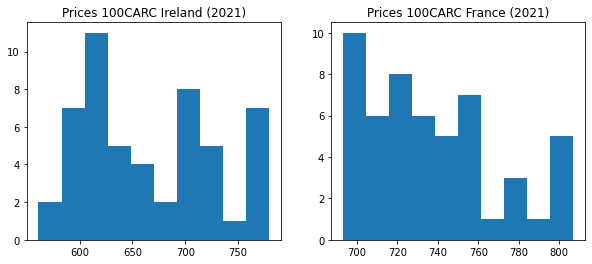

In [29]:
graf_his(prices, 'Ireland', 'France', 2021)

In [30]:
def graf_boxplot(dataframe, a, b, year):
    
    df = dataframe[(dataframe["marketingYear"] == year) &  dataframe['memberStateName'].isin([a,b])] #getting year and coutries

    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x= 'memberStateName', y= 'price', data = df, ax=ax) 

    ax.set_frame_on(False)
    ax.set_title(f'Prices {a} and {b} ({year})', loc='center', pad=30, fontdict={'fontsize':20}, 
                 color='#3f3f4e') 

    ax.get_yaxis().set_visible(True)
    ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
    ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
    ax.set_ylabel('PRICES (€/100CARC)', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

    plt.tight_layout();
    
    plt.show()

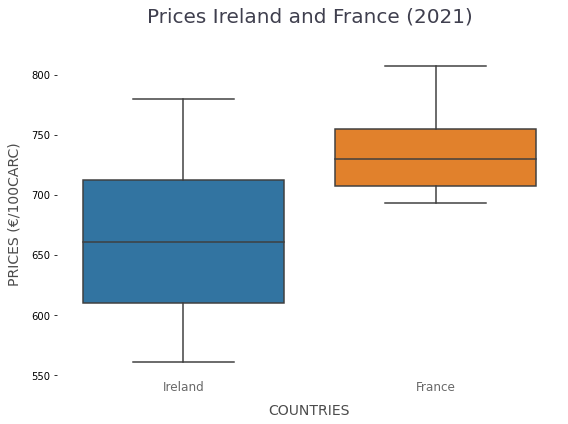

In [31]:
graf_boxplot(prices, 'Ireland', 'France', 2021)

In [32]:
def p_value(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"p-value of the hypothesis that IE prices are normally distributed ", stats.normaltest(price_a)[1])
    print(f"p-valuep of the hypothesis that FR prices are normally distributed ", stats.normaltest(price_b)[1])

In [33]:
p_value(prices, 'Ireland', 'France', 2021)

p-value of the hypothesis that IE prices are normally distributed  0.00011935949324125241
p-valuep of the hypothesis that FR prices are normally distributed  0.1135530992413906


In [34]:
def intervalo_conf(dados, significancia=0.95):
    a = 1.0*np.array(dados)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1+significancia)/2., n-1)
    return m-h, m+h

In [35]:
def intervalo_confi(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"95% confidence interval IE = ", intervalo_conf(price_a))
    

In [36]:
intervalo_confi(prices, 'Ireland', 'France', 2021)

95% confidence interval IE =  (647.927556279493, 682.221674489738)


In [37]:
def intervalo_conf_z(dados, significancia=0.05):
    a = 1.0*np.array(dados)
    n = len(a)
    m, sd = np.mean(a), np.std(a)
    h = -stats.norm.ppf(q=significancia) * (sd/((n-1)**0.5))
    return m-h, m+h

In [38]:
def intervalo_conf_z_(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"95% confidence interval IE = ", intervalo_conf(price_a))
    print(f"95% confidence interval FR = ", intervalo_conf_z(price_b))

In [39]:
intervalo_conf_z_(prices, 'Ireland','France', 2021)

95% confidence interval IE =  (647.927556279493, 682.221674489738)
95% confidence interval FR =  (729.4451619442204, 744.2856072865488)


In [40]:
def new_test(dataframe, a, b, year):
    
    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    z_stat, p_val = stats.mannwhitneyu(price_a, price_b)  
    print(f"The p-value of the Mann-Whitney-Wilcoxon test between the Data = ", p_val)

In [41]:
new_test(prices, 'Ireland', 'France', 2021)

The p-value of the Mann-Whitney-Wilcoxon test between the Data =  5.469206642788351e-08


# DASHBOARD

In [42]:
!pip install dash

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.read_csv('trade_export_IE.zip')

fig = px.bar(df, x="product", y="kg", color="partner", barmode="group")
opcoes = list(df['partner'].unique())
opcoes.append("Todas as Lojas")

app.layout = html.Div(children=[
    html.H1(children='EXPORT SHEEP AND GOATS 2021'),
    html.H2(children='Export whitin the countries of the European Union'),
    
    html.Div(children='''
        Select a country.
    '''),
    
    dcc.Dropdown(opcoes, value='All countries', id='COUNTRIES'),
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

@app.callback(

    Output('example-graph', 'figure'),

    Input('COUNTRIES', 'value')

)

def update_output(value):

    if value == "All countries":

        fig = px.bar(df, x="product", y="kg", color="partner", barmode="group")

    else:

        tabela_filtrada = df.loc[df["partner"]==value, :]

        fig = px.bar(tabela_filtrada, x="product", y="kg", color="partner", barmode="group")

    return fig

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
